# ****MORPHOLOGICAL PROCESSING****


#### Clàudia Blasco (1709871)
#### Laura Buide (1710559)
#### Carla Cruz (1703329)
#### Laia Espluga (1710510)
#### Lucía Rodríguez (1705385).

## **1. Introduction**
- Project Objective: Explain the fundamental concepts of morphological processing in computer vision.
- Definition: Morphological processing is a technique based on set theory, mainly applied to binary images but extendable to grayscale images.
- Applications: Shape extraction, noise reduction, edge detection, object segmentation, etc.

## **2. Mathematical Foundations of Morphological Processing**

### 1. Set Theory: Understanding Sets in a Discrete Space
Morphological image processing is fundamentally based on **set theory**, where objects in a **binary image** are treated as sets of points in a **discrete space** (typically a 2D grid).  
- A **binary image** consists of pixels with values **1 (foreground, object)** and **0 (background)**.  
- The object in an image is represented as a **set of foreground pixels**, while the background is treated as the **complementary set**.  

For example, an image \( A \) containing an object can be represented as:  


$$ A = \{(x,y) \mid f(x,y) = 1\} $$


where \( f(x,y) \) is the pixel value at coordinates \( (x,y) \).  

In morphological operations, these **sets of pixels** are manipulated using **structuring elements** to **modify shapes, extract features, or remove noise**.



### 2. Structuring Elements: Definition and Interaction with the Image  
A **structuring element (SE)** is a small matrix (or kernel) that interacts with an image to **probe** and **modify** its structure.  
- It is defined as a **binary set of pixels** (typically a small square, cross, or circle).  
- The **origin (center)** of the structuring element determines how it overlaps with the image pixels.  

Mathematically, if \( B \) is a structuring element, it is defined as:  

$$ B = \{(x,y) \mid b(x,y) = 1\}$$

where \( b(x,y) \) represents the pixel values of the structuring element.

#### *How the Structuring Element Interacts with an Image*  
- It is **placed over each pixel of the image**, aligning its center with the pixel.  
- Depending on the operation (erosion, dilation, etc.), the interaction between the structuring element and the underlying pixels **modifies the image**.  

For example, a **3×3 cross-shaped structuring element**:


$$ B =
\begin{bmatrix}
0 & 1 & 0 \\
1 & 1 & 1 \\
0 & 1 & 0
\end{bmatrix}
$$

This structuring element is commonly used for morphological operations like **dilation** and **erosion**.

### 3. Basic Set Operations in Morphological Processing  
Morphological processing uses fundamental **set operations** to manipulate images:

#### 3.1 Intersection (A ∩ B)  
- Finds **common pixels** between two sets (or binary images).  
- In morphological processing, intersection can be used to **detect overlapping objects**.  

Mathematically:

$$ A \cap B = \{(x,y) \mid (x,y) \in A \text{ and } (x,y) \in B\} $$

#### 3.2 Union (A ∪ B)  
- Combines pixels from both sets, **merging objects** in an image.  
- Used in **image fusion or combining binary masks**.  

Mathematically:

$$ A \cup B = \{(x,y) \mid (x,y) \in A \text{ or } (x,y) \in B\}$$

#### 3.3 Complement (¬A)  
- **Inverts the image** by flipping foreground and background.  
- Used to **highlight objects against the background** or **prepare images for further processing**.  

Mathematically:

$$ \neg A = \{(x,y) \mid (x,y) \notin A\}$$

### Application of These Operations in Morphology  
This **mathematical foundation** forms the basis for morphological operations like **erosion, dilation, opening, and closing**, which are essential for **shape analysis, noise removal, and feature extraction** in image processing. 


Here’s a Python code that demonstrates the mathematical applications for morphological image processing. This code applies fundamental morphological operations—erosion, dilation, and complementation—on a binary image, using a structuring element (kernel) to probe and modify the image’s structure.

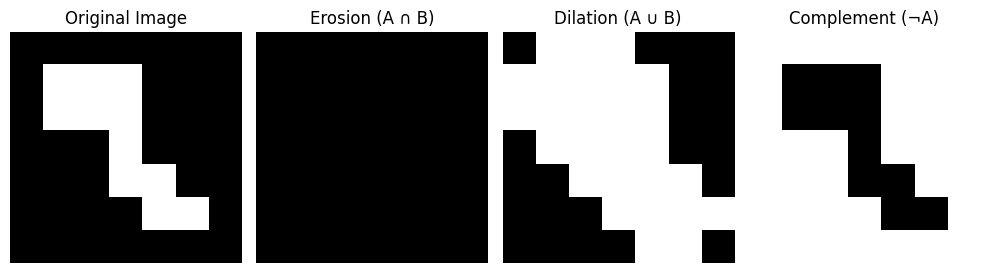

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_erosion, binary_dilation, binary_closing, binary_opening

# Create a sample binary image (foreground = 1, background = 0)
image = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0]
])

# Define a structuring element (3x3 cross-shaped)
structuring_element = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
])

# Plot the original image
plt.figure(figsize=(10, 4))
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Apply erosion (Intersection with structuring element)
eroded_image = binary_erosion(image, structure=structuring_element).astype(int)
plt.subplot(1, 4, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Erosion (A ∩ B)')
plt.axis('off')

# Apply dilation (Union with structuring element)
dilated_image = binary_dilation(image, structure=structuring_element).astype(int)
plt.subplot(1, 4, 3)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilation (A ∪ B)')
plt.axis('off')

# Apply complement (Inversion of image)
complement_image = np.logical_not(image).astype(int)
plt.subplot(1, 4, 4)
plt.imshow(complement_image, cmap='gray')
plt.title('Complement (¬A)')
plt.axis('off')

# Show all images
plt.tight_layout()
plt.show()


#### Explanation of the Code:
- **Original Image**: A 7x7 binary image with some foreground objects (1's) and background (0's).
- **Structuring Element**: A 3x3 cross-shaped structuring element used for morphological operations.
- **Erosion**: The operation of intersection between the image and the structuring element. Only pixels fully surrounded by the structuring element (1's) remain in the image.
- **Dilation**: The operation of union between the image and the structuring element. Pixels are added to the image where the structuring element overlaps.
- **Complement**: Inverts the image, changing foreground pixels (1's) to background pixels (0's) and vice versa.

#### How it connects to the mathematical applications:
- The **erosion** operation is equivalent to the intersection $(A \cap B)$, which removes pixels from the boundary of the foreground.
- The **dilation** operation is equivalent to the union $(A \cup B)$, which adds pixels to the boundary of the foreground.
- The **complement** operation inverts the image $( \neg A)$, flipping the 1's and 0's.

Running this code in a Jupyter notebook will display the original image and the results of the morphological operations, visually demonstrating the mathematical concepts of intersection, union, and complement.

## **3. Basic Morphological Operations**
- Erosion: Removes pixels from objects based on the structuring element.
- Dilation: Adds pixels to objects, expanding their regions.
- Opening: Smooths contours and removes small objects using erosion followed by dilation.
- Closing: Fills holes and smooths objects using dilation followed by erosion.

Part of code showing different morphological transformations:

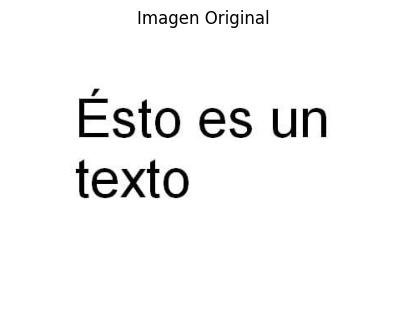

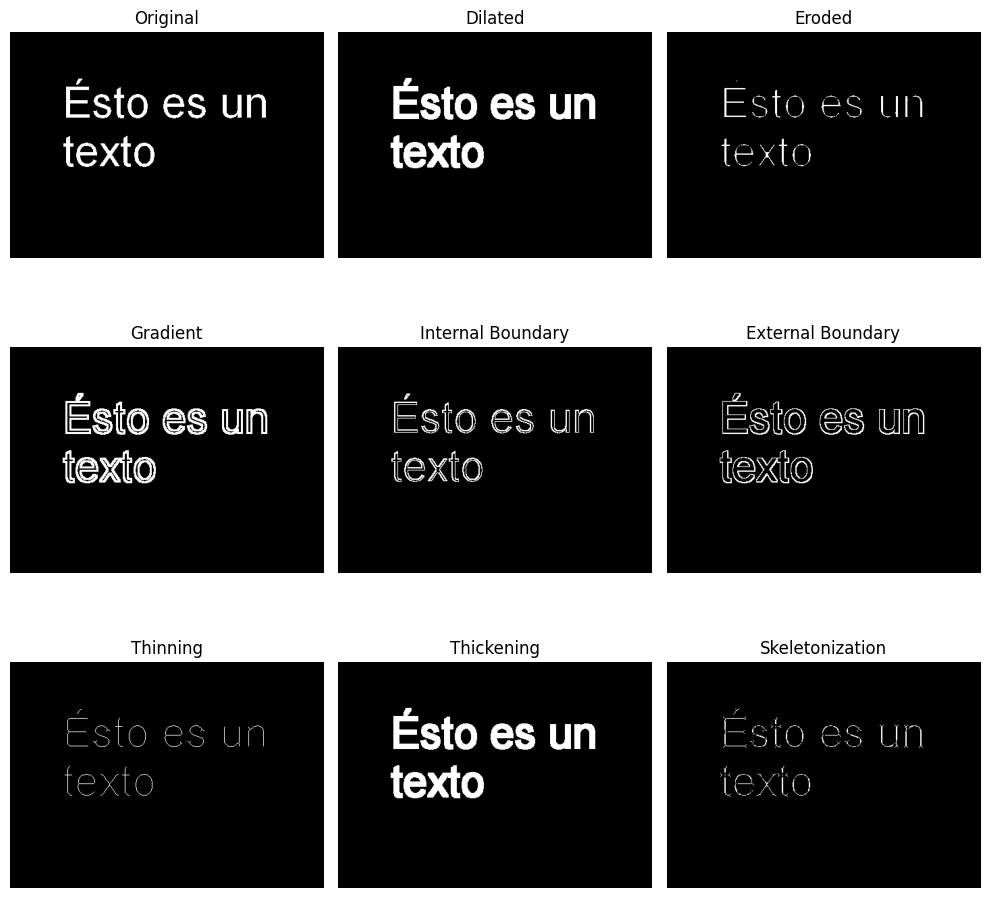

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import thin

# Cargar la imagen en escala de grises
image = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)


# Mostrar la imagen original
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.title("Imagen Original")
plt.axis("off")
plt.show()

# Convertir a imagen binaria (asegurar que el fondo sea negro y el texto blanco)
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Definir el kernel más grande para mejorar la erosión
kernel = np.ones((4, 4), np.uint8)  # Aumentado de (3,3) a (5,5)

# Aplicar transformaciones morfológicas
dilated = cv2.dilate(binary, kernel, iterations=1)
eroded = cv2.erode(binary, kernel, iterations=1)  # Aquí debe funcionar correctamente


# Otras transformaciones
gradient = cv2.morphologyEx(binary, cv2.MORPH_GRADIENT, kernel)
internal_boundary = cv2.subtract(binary, eroded)
external_boundary = cv2.subtract(dilated, binary)
thinning = thin(binary // 255) * 255
thickening = cv2.dilate(binary, kernel, iterations=1)

# Esqueletización rápida con OpenCV
binary_skel = binary.copy()
skel = np.zeros(binary_skel.shape, np.uint8)
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

while True:
    eroded_temp = cv2.erode(binary_skel, element)
    temp = cv2.dilate(eroded_temp, element)
    temp = cv2.subtract(binary_skel, temp)
    skel = cv2.bitwise_or(skel, temp)
    binary_skel = eroded_temp.copy()
    if cv2.countNonZero(binary_skel) == 0:
        break

# Mostrar todas las imágenes en un solo gráfico
titles = ["Original", "Dilated", "Eroded", "Gradient", "Internal Boundary", 
          "External Boundary", "Thinning", "Thickening", "Skeletonization"]
images = [binary, dilated, eroded, gradient, internal_boundary, 
          external_boundary, thinning.astype(np.uint8), thickening, skel]

plt.figure(figsize=(10,10))
for i in range(len(images)):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()

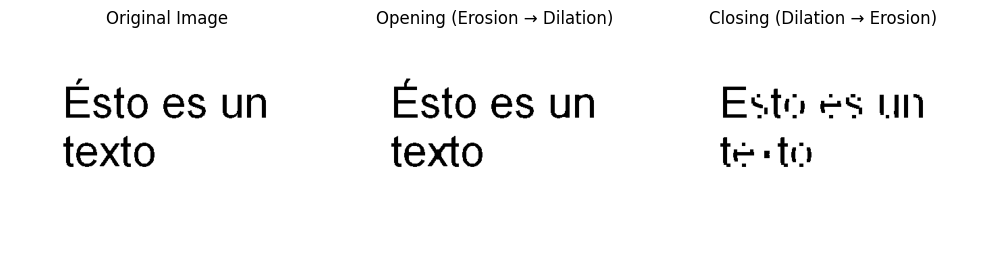

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

# Verify if the image loaded correctly
if image is None:
    raise FileNotFoundError("⚠️ Image not found. Check the filename and path.")

# Convert to binary (Thresholding)
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Define a structuring element (kernel)
kernel = np.ones((5,5), np.uint8)  

# Apply Morphological Opening (Erosion followed by Dilation)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# Apply Morphological Closing (Dilation followed by Erosion)
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# Display the original and processed images
titles = ["Original Image", "Opening (Erosion → Dilation)", "Closing (Dilation → Erosion)"]
images = [binary, opening, closing]

plt.figure(figsize=(10, 5))
for i in range(len(images)):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()

## **4. Advanced Morphological Operations**
- Morphological Gradient: Difference between dilation and erosion to highlight edges.
- Top-Hat and Black-Hat: Techniques to detect brighter or darker structures compared to the background.
- Skeletonization: Reduces objects to their central lines.

## **5. Practical Implementation**
- Common Libraries: OpenCV (Python), MATLAB, scikit-image.
- Code Examples: Implementation of each operation in Python using OpenCV.
- Before/After Comparison: Visualizing results by applying different operations to an image.

## **6. Applications and Use Cases**
- Computer Vision: Object recognition in medical, industrial, and security images.
- Image Reconstruction: Noise removal and image quality enhancement.
- Document Processing: Text recognition in scanned documents.

## **7. Conclusion and Discussion**
- Summary of key concepts.
- Limitations of morphological processing.
- Future improvements and integration with neural networks.
- Q&A session and audience discussion.
